**Import required modules and load data file**


In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

**Create train-test split**

In [5]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)

**Examining the data**

<ipython-input-6-715f51966a57>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


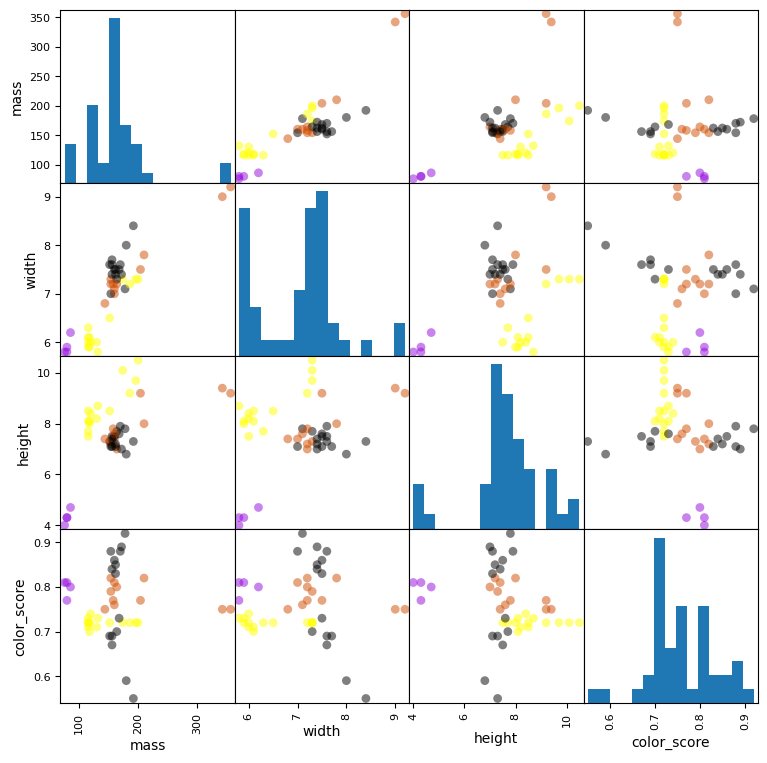

In [6]:
# plotting a scatter matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

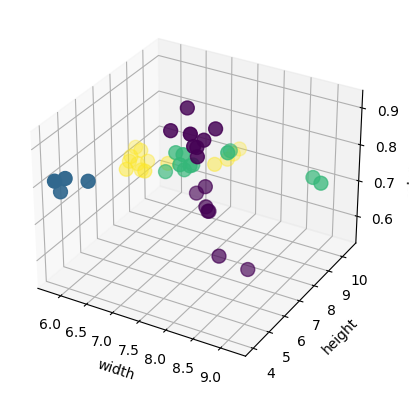

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'],X_train['color_score'], c = y_train, marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

**Create train-test split**

In [8]:
X  = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

**Create Classifier Object**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)

**Train the classifier (fit the estimator) using the training data**

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Estimate the accuracy of the classifier on future data, using the test data**

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

**Use the trained k-NN classifier model to classify new, previously unseen objects**

In [12]:
fruit_prediction = knn.predict([[20,4.5,6.6]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

**Plot the decision boundaries of the k-NN classifier**

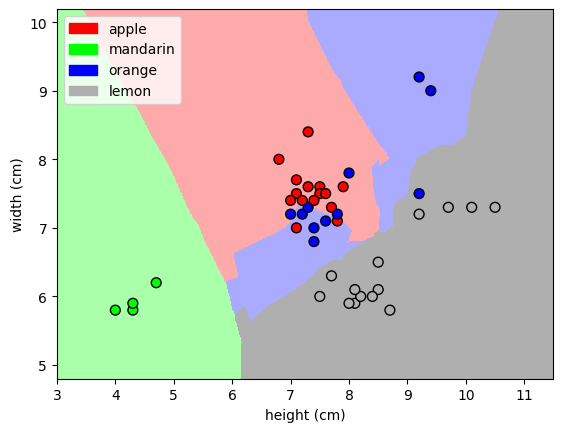

In [13]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

**How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?**

([<matplotlib.axis.XTick at 0x7d01fe7a5750>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

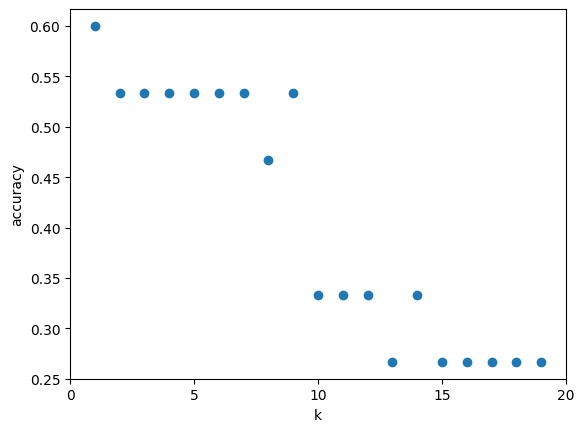

In [14]:
k_range = range(1,20)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

**How sensitive is k-NN classification accuracy to the train-test split proportion?**

Text(0, 0.5, 'accuracy')

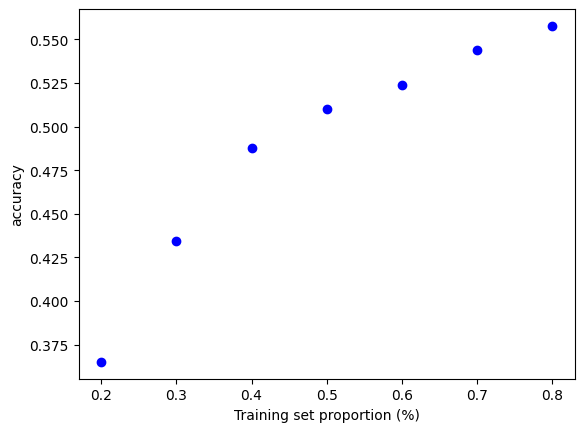

In [15]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors= 5)
plt.figure()
for s in t:
  scores = []
  for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1-s)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
  plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')